In [ ]:
'''PREFERENCES'''

#test file
targetFileName = '4x3x2'
# Number of test repetitions
loop_cnt = 1
#whether visualize graph or not
graph_visualization = True

2 1
4 0
5 4
6 2
7 6
9 8
11 10
12 0
13 12
14 2
15 14
16 12
16 4
18 17
18 14
18 6
20 16
21 20
22 18
23 22
new method Green Edges len :  22
xyz: 4 3 2
detected:  0 3
detected:  16 19
previous method Green vertex neighbors:  [0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 16, 17, 18, 19, 20, 21, 22, 23]
previous method Green vertex neighbors LENGTH:  26
new method Green vertex neighbors:  [[2, 26], [1, 26], [4, 26], [0, 26], [5, 26], [6, 26], [7, 26], [9, 26], [8, 26], [11, 26], [10, 26], [12, 26], [13, 26], [14, 26], [15, 26], [16, 26], [18, 26], [17, 26], [20, 26], [21, 26], [22, 26], [23, 26]]
new method Green vertex LENGTH:  22
edge:  [2, 26] label:  f weight:  0.5
edge:  [1, 26] label:  f weight:  0.5
edge:  [4, 26] label:  f weight:  0.5
edge:  [0, 26] label:  f weight:  0.5
edge:  [5, 26] label:  f weight:  0.5
edge:  [6, 26] label:  f weight:  0.5
edge:  [7, 26] label:  f weight:  0.5
edge:  [9, 26] label:  f weight:  0.5
edge:  [8, 26] label:  f weight:  0.5
edge:  [

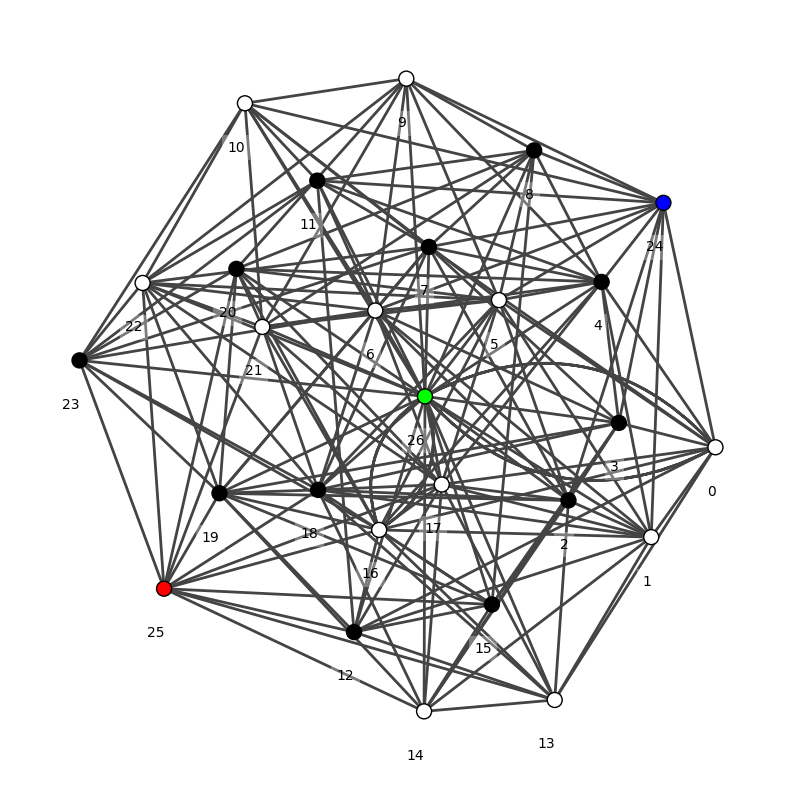

data_4x3x2 Results
STAT_n passed
STAT_e failed - 22 is not the same as expected 24
STAT_n_D passed
STAT_n_A passed
STAT_CC_D passed
STAT_CC_A passed
STAT_CC_D_An passed
STAT_CC_A_Ca passed
ABS_f_D passed
CT_f_conn_D_An passed
CT_f_conn_A_Ca passed
CT_n_D_adj_An failed - 6 is not the same as expected 7
CT_n_A_adj_Ca failed - 6 is not the same as expected 7
Total time to calculate graph: 0.03460502624511719 second(s)
Total time to calculate descriptors: 0.004971027374267578 second(s)
Peak memory usage for graph generation: 32067 bytes
Peak memory usage for descriptor calculation: 624 bytes
{'STAT_n': 24, 'STAT_e': 22, 'STAT_n_D': 12, 'STAT_n_A': 12, 'STAT_CC_D': 1, 'STAT_CC_A': 1, 'STAT_CC_D_An': 1, 'STAT_CC_A_Ca': 1, 'ABS_f_D': 0.5, 'CT_f_conn_D_An': 1.0, 'CT_f_conn_A_Ca': 1.0, 'CT_n_D_adj_An': 6, 'CT_n_A_adj_Ca': 6, 'time': 0.004971027374267578, 'mem': 624}



In [ ]:
import hwi_igraph_testing_main as ig
import importlib
import descriptors as ds
import os  
import time
import matplotlib.pyplot as plt
import tracemalloc

importlib.reload(ig)  # 강제 리로드
importlib.reload(ds)  # 강제 리로드

current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []
time_mem_stats = {}

    
for test_file in test_files:
    if targetFileName not in test_file:
        continue

    import time
    total_graph_time = 0
    for i in range(loop_cnt):

        # g = ig.generateGraph(data_path + test_file + ".txt")
        tracemalloc.start()
        graph_start = time.time()
        g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
        _stats = tracemalloc.get_traced_memory()
        graph_end = time.time()     
        tracemalloc.stop()
        graph_mem = _stats[1]-_stats[0]  
        stats = ds.desciptors(g)
        total_graph_time += graph_end - graph_start
        #ig.visual2D(g, 'graph')
        # g = ig.generateGraph("2D-testFile/testFile-10-2D.txt")     # utilizing the test file found in 2D-testFiles folder as an example
        if graph_visualization:
            ig.visualize(g,is_2D)
    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    descriptor_time = stats["time"]
    descriptor_mem = stats["mem"]

    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = total_graph_time/loop_cnt
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {descriptor_time} second(s)")
    print(f"Peak memory usage for graph generation: {graph_mem} bytes")
    print(f"Peak memory usage for descriptor calculation: {descriptor_mem} bytes")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}



In [26]:
import hwi_igraph_testing_main as ig
import igraph_testing_main as ig2
import importlib
import descriptors as ds
import os  
import time
import matplotlib.pyplot as plt
import tracemalloc

importlib.reload(ig)  # 강제 리로드

current_dir = os.getcwd()
data_path = f"{current_dir}/graspi_igraph/data/"
descriptors_path = f"{current_dir}/graspi_igraph/p1descriptors/"
test_files = [os.path.splitext(file)[0] for file in os.listdir(data_path)]
epsilon=1e-5

times = []
mems = []
time_mem_stats = {}

targetFileName = '100-2D'
loop_cnt = 1

    
for test_file in test_files:
    if targetFileName not in test_file:
        continue

    import time
    total_graph_time = 0
    for i in range(loop_cnt):

        # g = ig.generateGraph(data_path + test_file + ".txt")
        tracemalloc.start()
        graph_start = time.time()
        g,is_2D, black_vertices, white_vertices, black_green, black_interface_red, white_interface_blue, dim, interface_edge_comp_paths, shortest_path_to_red, shortest_path_to_blue, CT_n_D_adj_An, CT_n_A_adj_Ca= ig.generateGraph(data_path + test_file + ".txt")
        _stats = tracemalloc.get_traced_memory()
        graph_end = time.time()     
        tracemalloc.stop()
        graph_mem = _stats[1]-_stats[0]  
        stats = ds.desciptors(g)
        total_graph_time += graph_end - graph_start
        #ig.visual2D(g, 'graph')

    print(f"{test_file} Results")

    with open(descriptors_path + "p1descriptors." + test_file + ".log") as f:
        for line in f:
            stat = line.strip().split(" ")
            try:
                # if stats.get(stat[0], -1) == int(stat[1]):
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != int(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
            except ValueError:
                if abs(stats.get(stat[0], -1) - float(stat[1])) < epsilon:
                    print(f"{stat[0]} passed")
                elif stats.get(stat[0], -1) != -1 and stats.get(stat[0], -1) != float(stat[1]):
                    print(f"{stat[0]} failed - {stats.get(stat[0])} is not the same as expected {stat[1]}")
    descriptor_time = stats["time"]
    descriptor_mem = stats["mem"]

    times.append(descriptor_time)
    mems.append(descriptor_mem)

    graph_time = total_graph_time/loop_cnt
    print(f"Total time to calculate graph: {graph_time} second(s)")
    print(f"Total time to calculate descriptors: {descriptor_time} second(s)")
    print(f"Peak memory usage for graph generation: {graph_mem} bytes")
    print(f"Peak memory usage for descriptor calculation: {descriptor_mem} bytes")
    print(stats)
    print("")
    time_mem_stats[test_file] = {"graph_time": graph_time, "descriptor_time": descriptor_time,  "graph_mem":graph_mem, "descriptor_mem": descriptor_mem}



counted:  4900   toNode 5000
counted:  4901   toNode 5001
counted:  4902   toNode 5002
counted:  4903   toNode 5003
counted:  4904   toNode 5004
counted:  4905   toNode 5005
counted:  4906   toNode 5006
counted:  4907   toNode 5007
counted:  4908   toNode 5008
counted:  4909   toNode 5009
counted:  4910   toNode 5010
counted:  4911   toNode 5011
counted:  4912   toNode 5012
counted:  4913   toNode 5013
counted:  4914   toNode 5014
counted:  4915   toNode 5015
counted:  4916   toNode 5016
counted:  4917   toNode 5017
counted:  4918   toNode 5018
counted:  4919   toNode 5019
counted:  4920   toNode 5020
counted:  4921   toNode 5021
counted:  4922   toNode 5022
counted:  4923   toNode 5023
counted:  4924   toNode 5024
counted:  4925   toNode 5025
counted:  4926   toNode 5026
counted:  4927   toNode 5027
counted:  4928   toNode 5028
counted:  4929   toNode 5029
counted:  4930   toNode 5030
counted:  4931   toNode 5031
counted:  4932   toNode 5032
counted:  4933   toNode 5033
counted:  4934

In [ ]:
import hwi_testing_functions as tst